# 1.Моделирование случайных сигналов

## 1.1. Инициализация и формирование значений основных параметров

In [6]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [7]:
PIC_SIZE = (10, 6)  # Размер графика
fontSize=15 # Размер шрифта графиков
matplotlib.rcParams.update({'font.size': fontSize})
fontType='' # Тип шрифта графиков
tColor='b' # Цвет графиков во временной области
Color0='r' # Цвет графиков эталонного сигнала
tColorLight=[0.3, 0.7, 0.9] # Цвет графиков во временной области
fColor=[1, 0.4, 0] # Цвет графиков в частотной области
eColor=[0.85, 0.325, 0.098] # Цвет графиков погрешности
eColorLight=[0.9, 0.9, 0.4] # Цвет графиков погрешности
eColorDark=[0.635, 0.078, 0.184] # Цвет графиков погрешности
fd=100 # Частота дискретизации, Гц
t_min=-1; t_max=2; dt=t_max-t_min # Интервал определения функции
N = dt*fd # Количество отсчетов
f_mu = 15 # Математическое ожидание частоты сигнала
f_sigma = 0.5 # Среднеквадратичное отклонение частоты сигнала
f_a = f_mu-5*f_sigma # Интервал случайного распределения
f_b = f_mu+5*f_sigma # частоты
A_a = 10; A_b = 12 # Интервал случайного распределения амплитуды
dA = A_b-A_a # Длина интервала случайного распределения амплитуды

## 1.2 Моделирование случайного сигнала с нормальным распределением

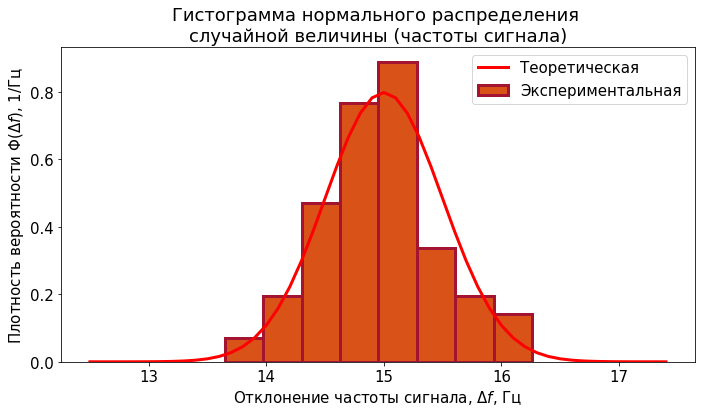

In [8]:
# Моделирование случайного сигнала с нормальным распределением
# (частота псевдослучайного сигнала)
np.random.seed(2020) # Инициализация генератора случайных чисел
td=np.linspace(t_min, t_max, N) # Формирование области определения
f = np.random.normal(f_mu, f_sigma, N) # Формирование значений
nPsd = 50 # Количество точек гистограммы
nBars = 8 # Количество прямоугольников гистограммы
fig, ax =plt.subplots() # Формирование графика
fig.set_size_inches(PIC_SIZE, forward=True) # Размер гафика
# Формирование гистограммы
ax.hist(f, nBars, density=1, label='Экспериментальная',
        edgecolor=eColorDark, color=eColor, linewidth=3) # Экспериментальная
# Формирование теоретической функции плотности распределения
f_pdf = np.arange(f_a,f_b, (f_b-f_a)/nPsd) # Область определения
phi_f = (1/(f_sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (f_pdf - f_mu)**2 / (2 * f_sigma**2))) # Плотность распределения
ax.plot(f_pdf,phi_f, label='Теоретическая', color=Color0, linewidth=3) # Теоретическая
ax.set_xlabel('Отклонение частоты сигнала, $\Delta f $, Гц') # Надпись оси абсцисс
ax.set_ylabel('Плотность вероятности $\Phi(\Delta f)$, 1/Гц') # Надпись оси ординат
ax.set_title('Гистограмма нормального распределения \nслучайной величины (частоты сигнала)') # Заголовок
ax.legend()
# Интервал настройки, чтобы предотвратить отсечение ylabel
fig.tight_layout()
plt.show()

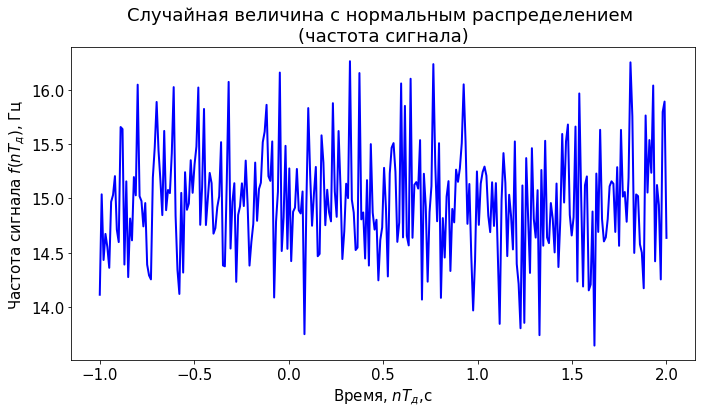

In [9]:
fig, ax =plt.subplots() # Формирование графика
fig.set_size_inches(PIC_SIZE) # Размер гафика
ax.plot(td, f, color=tColor, linewidth=2)
ax.set_xlabel('Время, $nT_д$,с') # Надпись оси абсцисс
ax.set_ylabel('Частота сигнала $f(nT_д)$, Гц') # Надпись оси ординат
ax.set_title('Случайная величина с нормальным распределением \n(частота сигнала)') # Заголовок

# Интервал настройки, чтобы предотвратить отсечение ylabel
fig.tight_layout()
plt.show()

## 1.3 Моделирование случайного сигнала с равномерным распределением

In [10]:
# Теоретическая функция плотности распределения
def uniform_teor(num):
    if num>=A_a and num<=A_b:
        return 1/(A_b-A_a)
    else:
        return 0

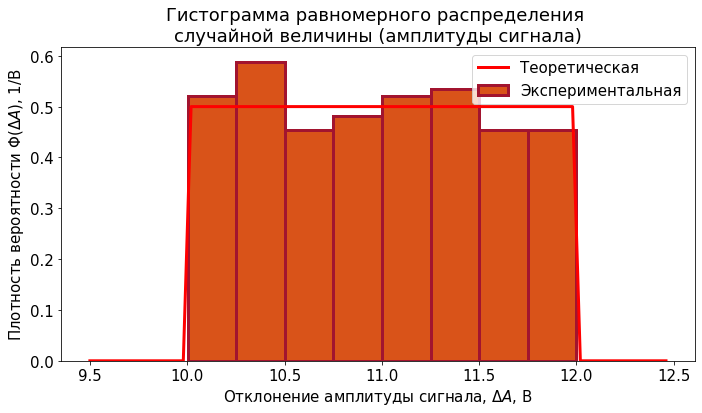

In [11]:

# Моделирование случайного сигнала с равномерным распределением
# (амплитуда псевдослучайного сигнала)
np.random.seed(2020) # Инициализация генератора случайных чисел
A = np.random.uniform(A_a, A_b, N) # Формирование значений
nPsd = 50 # Количество точек гистограммы
nBars = 8 # Количество прямоугольников гистограммы
fig, ax =plt.subplots() # Формирование графика
fig.set_size_inches(PIC_SIZE, forward=True) # Размер гафика
# Формирование гистограммы
ax.hist(A, nBars, density=1, label='Экспериментальная',
        edgecolor=eColorDark, color=eColor, linewidth=3) # Экспериментальная
# Формирование теоретической функции плотности распределения
A_pdf = np.arange(A_a-0.25*dA,A_b+0.25*dA,dA/nPsd) # Область определения
phi_A=[uniform_teor(i) for i in A_pdf]
ax.plot(A_pdf, phi_A, label='Теоретическая', color=Color0, linewidth=3) # Теоретическая
ax.set_xlabel('Отклонение амплитуды сигнала, $\Delta A $, В') # Надпись оси абсцисс
ax.set_ylabel('Плотность вероятности $\Phi(\Delta A)$, 1/В') # Надпись оси ординат
ax.set_title('Гистограмма равномерного распределения \nслучайной величины (амплитуды сигнала)') # Заголовок
ax.legend()
# Интервал настройки, чтобы предотвратить отсечение ylabel
fig.tight_layout()
plt.show()

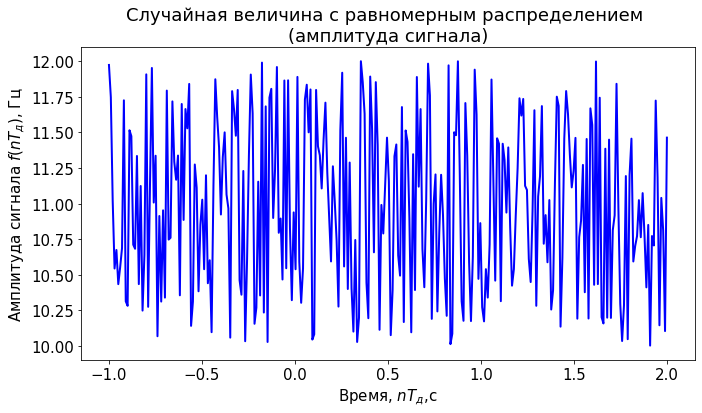

In [12]:
fig, ax =plt.subplots() # Формирование графика
fig.set_size_inches(PIC_SIZE) # Размер гафика
ax.plot(td, A, color=tColor, linewidth=2)
ax.set_xlabel('Время, $nT_д$,с') # Надпись оси абсцисс
ax.set_ylabel('Амплитуда сигнала $f(nT_д)$, Гц') # Надпись оси ординат
ax.set_title('Случайная величина с равномерным распределением \n(амплитуда сигнала)') # Заголовок
# Интервал настройки, чтобы предотвратить отсечение ylabel
fig.tight_layout()
plt.show()

## 1.4 Моделирование псевдослучайного гармонического сигнала

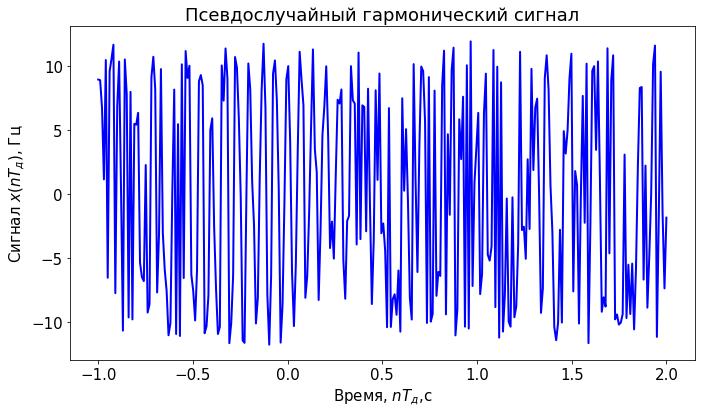

In [13]:
# Моделирование псевдослучайного гармонического сигнала
xd=A.transpose()*np.cos(2*np.pi*f.transpose()*td) # Формирование значений
fig, ax =plt.subplots() # Формирование графика
fig.set_size_inches(PIC_SIZE) # Размер гафика
ax.plot(td, xd, color=tColor, linewidth=2)
ax.set_xlabel('Время, $nT_д$,с') # Надпись оси абсцисс
ax.set_ylabel('Сигнал $x(nT_д)$, Гц') # Надпись оси ординат
ax.set_title('Псевдослучайный гармонический сигнал') # Заголовок
# Интервал настройки, чтобы предотвратить отсечение ylabel
fig.tight_layout()
plt.show()

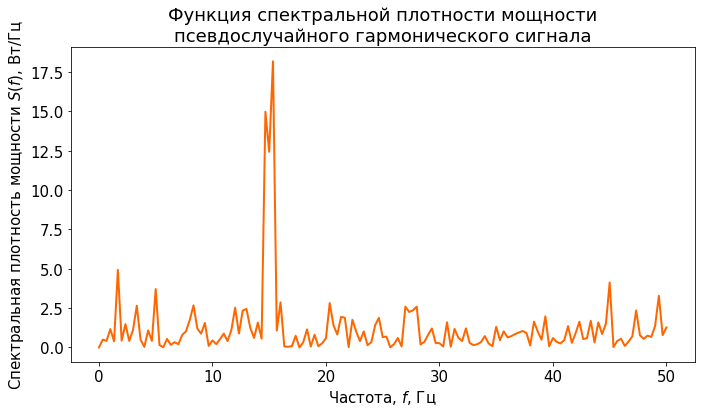

In [14]:
# Формирование функции спектральной плотности мощности
freq, psd = signal.periodogram(xd, fd, np.ones(xd.size)) # Формирование значений
fig, ax =plt.subplots() # Формирование графика
fig.set_size_inches(PIC_SIZE) # Размер гафика
ax.plot(freq, psd, color=fColor, linewidth=2)
ax.set_xlabel('Частота, $f$, Гц') # Надпись оси абсцисс
ax.set_ylabel('Спектральная плотность мощности $S(f)$, Вт/Гц') # Надпись оси ординат
ax.set_title('Функция спектральной плотности мощности\n'
             'псевдослучайного гармонического сигнала') # Заголовок
# Интервал настройки, чтобы предотвратить отсечение ylabel
fig.tight_layout()
plt.show()